In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import *
from sklearn import *

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
train = pd.read_csv('datasets/zindi/ixmobile/Train.csv')
test = pd.read_csv('datasets/zindi/ixmobile/Test.csv')
split = train.shape[0]
mobile =pd.concat([train, test], axis=0)

In [4]:
mobile.drop(['ID'], axis=1, inplace=True)

In [5]:
mobile.head(3)

,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0.0
1,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0.0
2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0.0


In [6]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154923 entries, 0 to 46476
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_code  154923 non-null  int64  
 1   region        154923 non-null  int64  
 2   age           154472 non-null  float64
 3   FQ1           154923 non-null  int64  
 4   FQ2           69925 non-null   float64
 5   FQ3           66146 non-null   float64
 6   FQ4           154923 non-null  int64  
 7   FQ5           30098 non-null   float64
 8   FQ6           86537 non-null   float64
 9   FQ7           86537 non-null   float64
 10  FQ8           154923 non-null  int64  
 11  FQ9           154923 non-null  int64  
 12  FQ10          154923 non-null  int64  
 13  FQ11          119788 non-null  float64
 14  FQ12          154923 non-null  int64  
 15  FQ13          154923 non-null  int64  
 16  FQ14          154923 non-null  int64  
 17  FQ15          154923 non-null  int64  
 18  FQ16 

<AxesSubplot:xlabel='Target', ylabel='count'>

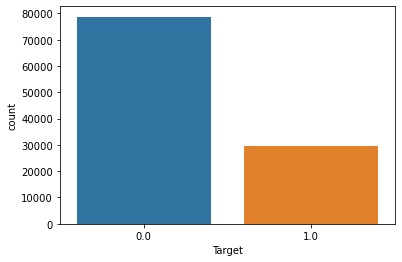

In [7]:
sns.countplot(x='Target', data=mobile)

In [8]:
mobile['region'].nunique()

9

In [9]:
mobile.region.value_counts()

 0    35000
 4    31066
 2    23062
 6    16504
 1    14145
 3    13833
 7    11609
 5     8704
-1     1000
Name: region, dtype: int64

In [10]:
for col in mobile.columns:
    mobile[col] = mobile[col].fillna(mobile[col].mode()[0])

In [11]:
mobile.describe()

,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
count,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000,154923.000000
mean,68.490734,2.897175,41.807569,1.562609,1.028563,1.127625,1.824597,1.030957,1.124830,1.115548,1.874247,1.799016,1.771499,1.916623,1.878798,1.909665,1.941494,1.888990,1.784984,1.962898,1.475339,1.699606,1.856342,1.833104,1.437359,1.656242,1.910510,1.898059,1.035934,1.864997,1.881799,1.987168,1.004835,1.891114,1.992603,1.003408,1.917940,1.179418,1.090781,0.631404,0.191779
std,41.523363,2.285400,17.897728,0.529573,0.195260,0.339788,0.436026,0.179534,0.353934,0.344747,0.382922,0.449564,0.465978,0.337743,0.364006,0.329371,0.278379,0.356875,0.444624,0.195063,0.578901,1.135676,0.383803,0.406382,0.523944,0.504065,0.296759,0.317438,0.188435,0.383102,0.365989,0.121646,0.071201,0.341924,0.092778,0.062965,0.309539,0.398815,0.301719,0.482426,0.393702
min,0.000000,-1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,1.000000,27.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,65.000000,3.000000,39.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,105.000000,4.000000,55.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
max,143.000000,7.000000,99.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000


<AxesSubplot:xlabel='FQ1', ylabel='count'>

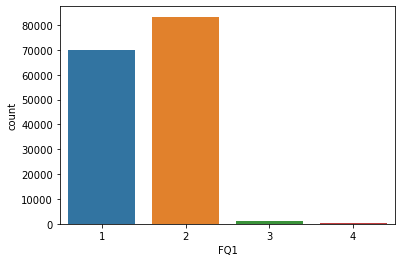

In [27]:
sns.countplot(x='FQ1', data=mobile)

In [48]:
mobile['age'] = mobile['age'].clip(lower = mobile['age'].quantile(0.10), upper = mobile['age'].quantile(0.90))

In [61]:
from sklearn.decomposition import PCA
def select_features(data_p):
    pca = PCA(n_components=24)
    pca_features = pca.fit_transform(data_p)
    return pca_features

In [62]:
mobile_pca = mobile.drop(['Target'], axis=1)
mobile_tar = mobile['Target']

In [63]:
mobile_tr = select_features(mobile_pca)

In [64]:
mobile2 = pd.DataFrame(mobile_tr)
mobile2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-67.485962,-6.365471,3.110853,2.310149,0.528805,0.445484,-0.419575,0.385511,0.612252,-0.817689,-0.781523,0.055801,0.190402,-0.809586,-0.163576,0.157662,0.012403,0.178999,0.100770,0.123747,0.079072,-0.086802,-0.312403,-0.767198
1,-36.507114,26.654849,4.114621,1.314312,-0.463054,0.450127,-0.401222,0.361832,0.633655,0.227105,0.162778,0.205576,0.209474,-0.850463,-0.202901,-0.122529,-0.797157,-0.269793,-0.878514,-0.116236,0.186819,-0.109418,-0.116301,0.112074
2,2.522567,-19.319837,4.100695,-0.692142,-0.483583,0.471563,-0.386310,0.341242,-0.395563,0.252237,0.337184,-0.767402,0.035772,0.174946,0.759293,0.142934,0.000987,0.189185,-0.832675,-0.097663,0.256603,-0.072445,-0.126434,0.193485


In [65]:
trainx = mobile2[:split]
test = mobile2[split:]
trainy = mobile_tar[:split]

In [66]:
trainy.shape

(108446,)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainx, trainy, test_size=0.30, random_state=42)

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [40]:
rf = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [21]:
xgb = XGBClassifier(learing_rate=1e-2, n_estimators=400, n_jobs=-1)
xgb.fit(X_train, y_train)

/home/elijah/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:10:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:10:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learing_rate=0.01, learning_rate=0.300000012, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
mlp = MLPClassifier(hidden_layer_sizes=300, solver='adam', activation='logistic', learning_rate_init=1e-3, random_state=42)
mlp.fit(X_train, y_train)

/home/elijah/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=300, random_state=42)

In [43]:
preds = mlp.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc(fpr, tpr)

0.5

In [44]:
predictions = mlp.predict(test)

In [45]:
test2 = pd.read_csv('datasets/zindi/ixmobile/Test.csv')

In [47]:
submission = pd.DataFrame()
submission['ID'] = test2['ID']
submission['target'] = predictions.reshape((predictions.shape[0]))
submission.to_csv('subm2.csv', index=False)